In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


In [4]:
df = pd.read_csv("E:\\Term Project_ML\\final_dataset.csv")
pd.set_option('display.max_columns', None)
df.head()

,timestamp,open,high,low,close,volume,EMA_50,EMA_200,dist_ema_200,ema_crossover,RSI,RSI_overbought,RSI_oversold,RSI_velocity,ATR,volatility,ADX,trending,ranging,BB_lower,BB_middle,BB_upper,percent_b,hour,day_of_week,london_session,ny_session,overlap_session,hour_sin,hour_cos,log_return,log_return_lag1,RSI_lag1,log_return_lag3,RSI_lag3,log_return_lag5,RSI_lag5,fractal_dim,EMA_200_1H,RSI_1H,ATR_1H,ADX_1H,EMA_200_4H,RSI_4H,ATR_4H,ADX_4H,EMA_200_D,RSI_D,ATR_D,ADX_D,price_vs_EMA200_1H,price_vs_EMA200_4H,price_vs_EMA200_D,RSI_dist_50_1H,RSI_dist_50_4H,RSI_dist_50_D,ATR_ratio_1H_4H,ATR_ratio_4H_D,trend_1H,trend_4H,trend_D,range_1H,range_4H,bull_1H,bull_4H,bull_D,trend_alignment_score,wti_close,wti_logret_15m,wti_mom_1h,wti_mom_4h,udx_close,udx_logret_15m,udx_mom_1h,udx_mom_4h,us10y,ca10y,us_ca_spread,ys_change,ys_z60,yield_available,wti_available,udx_available,target
0,2012-07-30 03:45:00+00:00,1.00399,1.00400,1.00366,1.00368,707.39,1.003828,1.004002,-0.000320,0,40.430022,0,0,-11.849016,0.000405,0.000403,36.089846,1,0,1.003635,1.004399,1.005162,0.029514,3,0,0,0,0,0.707107,0.707107,-0.000299,0.000030,45.930948,-0.000418,52.279038,-0.000299,57.276024,1.428451,1.009113,82.299723,0.000348,65.085442,1.014954,37.117655,0.001199,58.043153,1.006425,38.079194,0.004891,14.44241,-15.590156,-9.404533,-0.561344,32.299723,-12.882345,-11.920806,0.290668,0.245129,1,1,0,0,0,0,0,0,0,90.79,0.000661,0.007185,0.009740,13010.0,-0.000307,0.000384,0.001000,1.58,1.75,-0.17,0.02,-1.380939,1.0,1,1,1
1,2012-07-30 04:00:00+00:00,1.00367,1.00384,1.00366,1.00375,359.86,1.003825,1.003999,-0.000248,0,42.170394,0,0,-3.068694,0.000389,0.000387,34.492336,1,0,1.003628,1.004397,1.005166,0.079208,4,0,0,0,0,0.866025,0.500000,0.000070,-0.000299,40.430022,-0.000339,45.239088,0.000309,63.638614,1.430065,1.009059,53.322815,0.000404,62.486659,1.014842,34.713733,0.001215,55.722413,1.006425,38.079194,0.004891,14.44241,-13.153844,-9.126858,-0.547031,3.322815,-15.286267,-11.920806,0.332064,0.248505,1,1,0,0,0,0,0,0,0,90.73,-0.000661,0.006302,0.009079,13009.0,-0.000077,0.000000,0.000923,1.58,1.75,-0.17,0.02,-1.380939,1.0,1,1,1
2,2012-07-30 04:15:00+00:00,1.00377,1.00428,1.00376,1.00415,405.63,1.003837,1.004001,0.000149,0,50.983062,0,0,5.052115,0.000399,0.000397,32.643937,1,0,1.003679,1.004412,1.005146,0.320985,4,0,0,0,0,0.866025,0.500000,0.000398,0.000070,42.170394,0.000030,45.930948,-0.000418,52.279038,1.429619,1.009059,53.322815,0.000404,62.486659,1.014842,34.713733,0.001215,55.722413,1.006425,38.079194,0.004891,14.44241,-12.162695,-8.797734,-0.465242,3.322815,-15.286267,-11.920806,0.332064,0.248505,1,1,0,0,0,0,0,0,0,90.64,-0.000992,0.000662,0.007086,13008.0,-0.000077,-0.000615,0.001077,1.58,1.75,-0.17,0.02,-1.380939,1.0,1,1,1
3,2012-07-30 04:30:00+00:00,1.00415,1.00462,1.00415,1.00448,960.78,1.003863,1.004005,0.000473,0,56.828214,0,0,16.398192,0.000404,0.000402,31.844678,1,0,1.003713,1.004431,1.005150,0.533745,4,0,0,0,0,0.866025,0.500000,0.000329,0.000398,50.983062,-0.000299,40.430022,-0.000339,45.239088,1.412860,1.009059,53.322815,0.000404,62.486659,1.014842,34.713733,0.001215,55.722413,1.006425,38.079194,0.004891,14.44241,-11.344996,-8.526206,-0.397766,3.322815,-15.286267,-11.920806,0.332064,0.248505,1,1,0,0,0,0,0,0,0,90.49,-0.001656,-0.002649,0.004763,12996.0,-0.000923,-0.001384,0.000077,1.58,1.75,-0.17,0.02,-1.380939,1.0,1,1,1
4,2012-07-30 04:45:00+00:00,1.00451,1.00469,1.00441,1.00446,692.64,1.003886,1.004010,0.000448,0,56.389333,0,0,14.218939,0.000395,0.000393,31.272003,1,0,1.003723,1.004440,1.005156,0.514315,4,0,0,0,0,0.866025,0.500000,-0.000020,0.000329,56.828214,0.000070,42.170394,0.000030,45.930948,1.405050,1.009059,53.322815,0.000404,62.486659,1.014842,34.713733,0.001215,55.722413,1.006425,38.079194,0.004891,14.44241,-11.394554,-8.542662,-0.401855,3.322815,-15.286267,-11.920806,0.332064,0.248505,1,1,0,0,0,0,0,0,0,90.61,0.001325,-0.001985,0.006977,12995.0,-0.000077,-0.001154,0.000154,1.58,1.75,-0.17,0.02,-1.380939,1.0,1,1,1


In [5]:
df.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume', 'EMA_50',
       'EMA_200', 'dist_ema_200', 'ema_crossover', 'RSI', 'RSI_overbought',
       'RSI_oversold', 'RSI_velocity', 'ATR', 'volatility', 'ADX', 'trending',
       'ranging', 'BB_lower', 'BB_middle', 'BB_upper', 'percent_b', 'hour',
       'day_of_week', 'london_session', 'ny_session', 'overlap_session',
       'hour_sin', 'hour_cos', 'log_return', 'log_return_lag1', 'RSI_lag1',
       'log_return_lag3', 'RSI_lag3', 'log_return_lag5', 'RSI_lag5',
       'fractal_dim', 'EMA_200_1H', 'RSI_1H', 'ATR_1H', 'ADX_1H', 'EMA_200_4H',
       'RSI_4H', 'ATR_4H', 'ADX_4H', 'EMA_200_D', 'RSI_D', 'ATR_D', 'ADX_D',
       'price_vs_EMA200_1H', 'price_vs_EMA200_4H', 'price_vs_EMA200_D',
       'RSI_dist_50_1H', 'RSI_dist_50_4H', 'RSI_dist_50_D', 'ATR_ratio_1H_4H',
       'ATR_ratio_4H_D', 'trend_1H', 'trend_4H', 'trend_D', 'range_1H',
       'range_4H', 'bull_1H', 'bull_4H', 'bull_D', 'trend_alignment_score',
       'wti_close', 'wt

In [6]:
df['target'].unique()  #target = 1 → Buy, target = -1 → Sell,target = 0 → No trade / Hold

array([ 1, -1,  0])

In [7]:
df = df.copy()
df['timestamp'] = pd.to_datetime(df['timestamp'])

X = df.drop(columns=['target', 'timestamp'])
y = df['target']


In [8]:
# Replace infinities
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill missing values using training statistics later


In [9]:
tscv = TimeSeriesSplit(n_splits=5)

In [10]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(
        multi_class='multinomial',
        max_iter=200,
        class_weight='balanced',
        n_jobs=-1
    ))
])


In [11]:
all_preds = []
all_true = []

for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Fill NaNs using TRAIN medians only (no leakage)
    medians = X_train.median()
    X_train = X_train.fillna(medians)
    X_test  = X_test.fillna(medians)

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    all_preds.extend(preds)
    all_true.extend(y_test)


E:\Users\Mozahid\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
E:\Users\Mozahid\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
E:\Users\Mozahid\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
E:\Users\Mozahid\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated i

In [12]:
print(classification_report(all_true, all_preds))
print(confusion_matrix(all_true, all_preds))


              precision    recall  f1-score   support

          -1       0.42      0.41      0.42     97752
           0       0.51      0.74      0.60     78332
           1       0.47      0.32      0.38    100036

    accuracy                           0.47    276120
   macro avg       0.47      0.49      0.47    276120
weighted avg       0.46      0.47      0.45    276120

[[40068 28514 29170]
 [13591 57982  6759]
 [40736 27787 31513]]


In [13]:
trade_mask = y != 0

X_trade = X[trade_mask]
y_trade = y[trade_mask]


In [14]:

feature_importance = pd.Series(
    model.named_steps['clf'].coef_[0],
    index=X.columns
).sort_values(key=abs, ascending=False)

feature_importance.head(20)


volatility          -0.499202
ATR                  0.345151
hour_cos            -0.310321
EMA_200_D            0.304193
hour_sin             0.284306
ATR_4H               0.133923
price_vs_EMA200_D    0.125481
EMA_200_4H           0.110554
low                 -0.104387
udx_mom_4h           0.094615
ATR_D               -0.090474
ATR_1H               0.089820
ATR_ratio_4H_D      -0.087391
ny_session          -0.073003
open                -0.063404
ATR_ratio_1H_4H     -0.063400
close               -0.061927
EMA_200             -0.056056
EMA_200_1H          -0.049763
us_ca_spread        -0.045681
dtype: float64

C:\Users\Mozahid\AppData\Local\Temp\ipykernel_20344\171837779.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


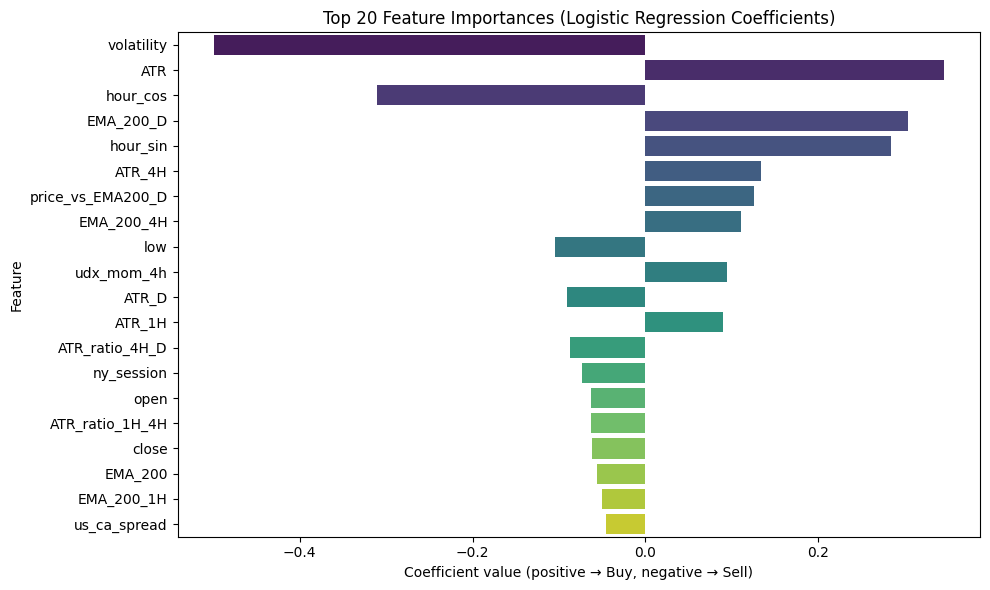

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use the same feature_importance Series you already have
top_features = feature_importance.head(20)

plt.figure(figsize=(10,6))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.title("Top 20 Feature Importances (Logistic Regression Coefficients)")
plt.xlabel("Coefficient value (positive → Buy, negative → Sell)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


### NEXT STAGE: Improve the Baseline 

Tune C (regularization strength)

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


In [19]:
model = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
    ('clf', LogisticRegression(
        multi_class='multinomial',
        max_iter=500,
        class_weight='balanced',
        solver='lbfgs'
    ))
])


In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'clf__C': [0.01, 0.1, 1, 5, 10],
    'clf__penalty': ['l2']
}

gs = GridSearchCV(
    model,
    param_grid,
    scoring='f1_macro',
    cv=tscv,
    n_jobs=-1
)

gs.fit(X, y)
print(gs.best_params_)


E:\Users\Mozahid\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


{'clf__C': 0.01, 'clf__penalty': 'l2'}


In [21]:
best_model = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
    ('clf', LogisticRegression(
        multi_class='multinomial',
        max_iter=500,
        class_weight='balanced',
        C=0.01,
        penalty='l2',
        solver='lbfgs'
    ))
])

In [22]:
all_preds = []
all_true = []

for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    best_model.fit(X_train, y_train)
    preds = best_model.predict(X_test)

    all_preds.extend(preds)
    all_true.extend(y_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(all_true, all_preds))
print(confusion_matrix(all_true, all_preds))


E:\Users\Mozahid\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
E:\Users\Mozahid\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
E:\Users\Mozahid\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
E:\Users\Mozahid\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated i

              precision    recall  f1-score   support

          -1       0.43      0.41      0.42     97752
           0       0.52      0.77      0.62     78332
           1       0.47      0.31      0.37    100036

    accuracy                           0.48    276120
   macro avg       0.47      0.50      0.47    276120
weighted avg       0.47      0.48      0.46    276120

[[40500 28469 28783]
 [11922 60106  6304]
 [41153 27793 31090]]


#### class_weight = {-1:1.5, 0:0.5, 1:1.5}

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import classification_report, confusion_matrix

tscv = TimeSeriesSplit(n_splits=5)

model = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
    ('clf', LogisticRegression(
        multi_class='multinomial',
        penalty='l2',       # stable
        solver='lbfgs',
        C=0.1,              # mild regularization
        class_weight={-1:1.2, 0:1.0, 1:1.2},
        max_iter=500,
        n_jobs=-1
    ))
])

all_preds = []
all_true = []

for train_idx, test_idx in tscv.split(X_reduced):
    X_train, X_test = X_reduced.iloc[train_idx], X_reduced.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    all_preds.extend(preds)
    all_true.extend(y_test)

print(classification_report(all_true, all_preds))
print(confusion_matrix(all_true, all_preds))


E:\Users\Mozahid\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
E:\Users\Mozahid\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
E:\Users\Mozahid\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
E:\Users\Mozahid\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated i

              precision    recall  f1-score   support

          -1       0.41      0.44      0.42     97752
           0       0.56      0.62      0.59     78332
           1       0.45      0.38      0.41    100036

    accuracy                           0.47    276120
   macro avg       0.47      0.48      0.47    276120
weighted avg       0.47      0.47      0.47    276120

[[42546 19929 35277]
 [18230 48687 11415]
 [43142 18656 38238]]


In [29]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import classification_report, confusion_matrix

# -----------------------------
# 1️ Prepare features & target
# -----------------------------
X = df.drop(columns=['target', 'timestamp'])
y = df['target']

# Replace infinities
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# -----------------------------
# 2️ Drop highly correlated features
# -----------------------------
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]
print("Dropping highly correlated features:", to_drop)
X = X.drop(columns=to_drop)

# -----------------------------
# 3️ Manual selection of strongest indicators
# -----------------------------
# Keep one per type/timeframe (example)
manual_keep = [
    'EMA_50', 'EMA_200', 'RSI', 'ATR', 'ADX',
    'EMA_200_1H', 'RSI_1H', 'ATR_1H', 'ADX_1H',
    'EMA_200_4H', 'RSI_4H', 'ATR_4H', 'ADX_4H',
    'EMA_200_D', 'RSI_D', 'ATR_D', 'ADX_D',
    'log_return', 'log_return_lag1', 'log_return_lag3', 'log_return_lag5',
    'hour_sin', 'hour_cos', 'day_of_week'
]

X = X[[col for col in X.columns if col in manual_keep]]
print("Number of features after manual selection:", X.shape[1])

# -----------------------------
# 4️ Define TimeSeriesSplit
# -----------------------------
tscv = TimeSeriesSplit(n_splits=5)

# -----------------------------
# 5️ Define Logistic Regression pipeline
# -----------------------------
model = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
    ('clf', LogisticRegression(
        multi_class='multinomial',
        penalty='l2',               # stable for multiple correlated features
        solver='lbfgs',
        C=0.1,                      # mild regularization
        class_weight={-1:1.2, 0:1.0, 1:1.2},  # boost ±1 signals
        max_iter=500,
        n_jobs=-1
    ))
])

# -----------------------------
# 6️ Run TimeSeries CV
# -----------------------------
all_preds = []
all_true = []

for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    all_preds.extend(preds)
    all_true.extend(y_test)

# -----------------------------
# 7️ Evaluate
# -----------------------------
print(classification_report(all_true, all_preds))
print(confusion_matrix(all_true, all_preds))


Dropping highly correlated features: ['high', 'low', 'close', 'EMA_50', 'EMA_200', 'volatility', 'BB_lower', 'BB_middle', 'BB_upper', 'RSI_lag1', 'EMA_200_1H', 'EMA_200_4H', 'EMA_200_D', 'ATR_D', 'price_vs_EMA200_4H', 'RSI_dist_50_1H', 'RSI_dist_50_4H', 'RSI_dist_50_D', 'ca10y']
Number of features after manual selection: 18


E:\Users\Mozahid\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
E:\Users\Mozahid\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
E:\Users\Mozahid\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
E:\Users\Mozahid\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated i

              precision    recall  f1-score   support

          -1       0.41      0.18      0.25     97752
           0       0.53      0.68      0.60     78332
           1       0.45      0.59      0.51    100036

    accuracy                           0.47    276120
   macro avg       0.46      0.49      0.45    276120
weighted avg       0.46      0.47      0.44    276120

[[17942 23867 55943]
 [ 7423 53657 17252]
 [17871 23336 58829]]


In [30]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import classification_report, confusion_matrix

# -----------------------------
# 1️⃣ Prepare features & target
# -----------------------------
X = df.drop(columns=['target', 'timestamp'])
y = df['target']

# Replace infinities
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# -----------------------------
# 2️⃣ Drop highly correlated features
# -----------------------------
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]
X = X.drop(columns=to_drop)

# -----------------------------
# 3️⃣ Manual selection of strong indicators
# -----------------------------
manual_keep = [
    'EMA_50', 'EMA_200', 'RSI', 'ATR', 'ADX',
    'EMA_200_1H', 'RSI_1H', 'ATR_1H', 'ADX_1H',
    'EMA_200_4H', 'RSI_4H', 'ATR_4H', 'ADX_4H',
    'EMA_200_D', 'RSI_D', 'ATR_D', 'ADX_D',
    'log_return', 'log_return_lag1', 'log_return_lag3', 'log_return_lag5',
    'hour_sin', 'hour_cos', 'day_of_week'
]
X = X[[col for col in X.columns if col in manual_keep]]

# -----------------------------
# 4️⃣ TimeSeries split
# -----------------------------
tscv = TimeSeriesSplit(n_splits=5)

# -----------------------------
# 5️⃣ Stage 1: Trade vs Hold
# -----------------------------
stage1_model = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
    ('clf', LogisticRegression(
        multi_class='auto',
        solver='lbfgs',
        C=0.1,
        class_weight={-1:1.1, 0:1.0, 1:1.1},
        max_iter=500,
        n_jobs=-1
    ))
])

# -----------------------------
# 6️⃣ Stage 2: BUY vs SELL
# -----------------------------
stage2_model = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
    ('clf', LogisticRegression(
        multi_class='multinomial',
        solver='lbfgs',
        C=0.1,
        class_weight={-1:1.3, 1:1.2},  # slightly boost SELL
        max_iter=500,
        n_jobs=-1
    ))
])

# -----------------------------
# 7️⃣ Run TimeSeries CV
# -----------------------------
all_preds = []
all_true = []

for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Stage 1: Trade vs Hold
    y_train_stage1 = y_train.copy()
    y_train_stage1[y_train_stage1 != 0] = 1  # Trades = 1, HOLD = 0
    stage1_model.fit(X_train, y_train_stage1)
    stage1_pred = stage1_model.predict(X_test)

    # Stage 2: BUY vs SELL on predicted trades
    preds = []
    trade_indices = np.where(stage1_pred == 1)[0]
    hold_indices = np.where(stage1_pred == 0)[0]

    if len(trade_indices) > 0:
        X_test_trades = X_test.iloc[trade_indices]
        y_train_trades = y_train[y_train != 0]  # only train on trades
        stage2_model.fit(X_train[y_train != 0], y_train_trades)
        stage2_pred = stage2_model.predict(X_test_trades)

    # Combine predictions
    temp_preds = np.zeros(len(X_test), dtype=int)
    temp_preds[hold_indices] = 0  # HOLD
    if len(trade_indices) > 0:
        temp_preds[trade_indices] = stage2_pred

    all_preds.extend(temp_preds)
    all_true.extend(y_test)

# -----------------------------
# 8️⃣ Evaluate
# -----------------------------
print(classification_report(all_true, all_preds))
print(confusion_matrix(all_true, all_preds))


E:\Users\Mozahid\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
E:\Users\Mozahid\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
E:\Users\Mozahid\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
E:\Users\Mozahid\anaconda3\Lib\site-packages\sklearn\li

              precision    recall  f1-score   support

          -1       0.40      0.51      0.45     97752
           0       0.59      0.51      0.55     78332
           1       0.43      0.36      0.39    100036

    accuracy                           0.46    276120
   macro avg       0.47      0.46      0.46    276120
weighted avg       0.47      0.46      0.46    276120

[[50091 13730 33931]
 [24454 39963 13915]
 [50422 13670 35944]]


### Two-stage pipeline using LightGBM

In [33]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

# -----------------------------
# 1️⃣ Prepare features & target
# -----------------------------
X = df.drop(columns=['target', 'timestamp'])
y = df['target']

# Replace infinities
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# -----------------------------
# 2️⃣ Drop highly correlated features
# -----------------------------
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]
X = X.drop(columns=to_drop)

# -----------------------------
# 3️⃣ Manual selection of strong indicators
# -----------------------------
manual_keep = [
    'EMA_50', 'EMA_200', 'RSI', 'ATR', 'ADX',
    'EMA_200_1H', 'RSI_1H', 'ATR_1H', 'ADX_1H',
    'EMA_200_4H', 'RSI_4H', 'ATR_4H', 'ADX_4H',
    'EMA_200_D', 'RSI_D', 'ATR_D', 'ADX_D',
    'log_return', 'log_return_lag1', 'log_return_lag3', 'log_return_lag5',
    'hour_sin', 'hour_cos', 'day_of_week'
]
X = X[[col for col in X.columns if col in manual_keep]]

# -----------------------------
# 4️⃣ TimeSeries split
# -----------------------------
tscv = TimeSeriesSplit(n_splits=5)

# -----------------------------
# 5️⃣ Stage 1: Trade vs Hold (LightGBM)
# -----------------------------
all_preds = []
all_true = []

for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Fill NaNs with median
    medians = X_train.median()
    X_train = X_train.fillna(medians)
    X_test = X_test.fillna(medians)

    # Stage 1: Trade (±1) vs Hold (0)
    y_train_stage1 = y_train.copy()
    y_train_stage1[y_train_stage1 != 0] = 1  # Trades=1, HOLD=0

    lgb_stage1 = lgb.LGBMClassifier(
        objective='binary',
        n_estimators=500,
        learning_rate=0.1,
        class_weight={0:1.0, 1:1.2},
        n_jobs=-1,
        random_state=42
    )
    lgb_stage1.fit(X_train, y_train_stage1)
    stage1_pred = lgb_stage1.predict(X_test)

    # Stage 2: BUY vs SELL on predicted trades
    trade_indices = np.where(stage1_pred == 1)[0]
    hold_indices = np.where(stage1_pred == 0)[0]

    temp_preds = np.zeros(len(X_test), dtype=int)
    temp_preds[hold_indices] = 0  # HOLD

    if len(trade_indices) > 0:
        X_test_trades = X_test.iloc[trade_indices]
        X_train_trades = X_train[y_train != 0]
        y_train_trades = y_train[y_train != 0]

        lgb_stage2 = lgb.LGBMClassifier(
            objective='multiclass',
            num_class=2,
            n_estimators=500,
            learning_rate=0.1,
            class_weight={-1:1.3, 1:1.2},
            n_jobs=-1,
            random_state=42
        )
        lgb_stage2.fit(X_train_trades, y_train_trades)
        stage2_pred = lgb_stage2.predict(X_test_trades)
        temp_preds[trade_indices] = stage2_pred

    all_preds.extend(temp_preds)
    all_true.extend(y_test)

# -----------------------------
# 6️⃣ Evaluate
# -----------------------------
print(classification_report(all_true, all_preds))
print(confusion_matrix(all_true, all_preds))


[LightGBM] [Info] Number of positive: 39716, number of negative: 15508
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3869
[LightGBM] [Info] Number of data points in the train set: 55224, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.754493 -> initscore=1.122720
[LightGBM] [Info] Start training from score 1.122720
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3866
[LightGBM] [Info] Number of data points in the train set: 39716, number of used features: 18
[LightGBM] [Info] Start training from score -0.684796
[LightGBM] [Info] Start training from score -0.701569
[LightGBM] [Info] Number of positive: 78300, nu

### Random Forest (single-stage, 3-class)

In [34]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix

# -----------------------------
# 1️⃣ Prepare data
# -----------------------------
X = df.drop(columns=['target', 'timestamp'])
y = df['target']

X.replace([np.inf, -np.inf], np.nan, inplace=True)

tscv = TimeSeriesSplit(n_splits=5)

all_preds = []
all_true = []

# -----------------------------
# 2️⃣ Time-series CV
# -----------------------------
for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Median imputation (no leakage)
    imputer = SimpleImputer(strategy='median')
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)

    # -----------------------------
    # 3️⃣ Random Forest model
    # -----------------------------
    rf = RandomForestClassifier(
        n_estimators=300,
        max_depth=10,
        min_samples_leaf=200,
        max_features='sqrt',
        class_weight='balanced',
        n_jobs=-1,
        random_state=42
    )

    rf.fit(X_train, y_train)
    preds = rf.predict(X_test)

    all_preds.extend(preds)
    all_true.extend(y_test)

# -----------------------------
# 4️⃣ Evaluation
# -----------------------------
print(classification_report(all_true, all_preds))
print(confusion_matrix(all_true, all_preds))


              precision    recall  f1-score   support

          -1       0.44      0.46      0.45     97752
           0       0.51      0.81      0.62     78332
           1       0.49      0.24      0.33    100036

    accuracy                           0.48    276120
   macro avg       0.48      0.50      0.47    276120
weighted avg       0.48      0.48      0.45    276120

[[44697 31231 21824]
 [11624 63121  3587]
 [45933 29759 24344]]


In [36]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix

# =========================
# 1️⃣ Prepare data
# =========================
X = df.drop(columns=['target', 'timestamp'])
y = df['target']

# Replace inf with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

tscv = TimeSeriesSplit(n_splits=5)

all_preds = []
all_true = []

# =========================
# 2️⃣ Time-series CV loop
# =========================
for fold, (train_idx, test_idx) in enumerate(tscv.split(X), 1):
    print(f"Fold {fold}")

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # -------------------------
    # Impute using TRAIN only
    # -------------------------
    imputer = SimpleImputer(strategy='median')
    X_train = imputer.fit_transform(X_train)
    X_test  = imputer.transform(X_test)

    # -------------------------
    # Random Forest model
    # -------------------------
    rf = RandomForestClassifier(
        n_estimators=400,
        max_depth=12,
        min_samples_leaf=150,
        max_features='sqrt',
        class_weight={-1:1.0, 0:0.8, 1:1.2},
        n_jobs=-1,
        random_state=42
    )

    rf.fit(X_train, y_train)

    # -------------------------
    # Probability predictions
    # -------------------------
    proba = rf.predict_proba(X_test)
    class_order = rf.classes_  # e.g. [-1, 0, 1]

    idx_sell = np.where(class_order == -1)[0][0]
    idx_hold = np.where(class_order == 0)[0][0]
    idx_buy  = np.where(class_order == 1)[0][0]

    # -------------------------
    # Threshold tuning
    # -------------------------
    preds = []
    for p in proba:
        if p[idx_buy] > 0.38:
            preds.append(1)
        elif p[idx_sell] > 0.38:
            preds.append(-1)
        else:
            preds.append(0)

    all_preds.extend(preds)
    all_true.extend(y_test)

# =========================
# 3️⃣ Final evaluation
# =========================
print("\n=== Classification Report ===")
print(classification_report(all_true, all_preds))

print("\n=== Confusion Matrix ===")
print(confusion_matrix(all_true, all_preds))


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5

=== Classification Report ===
              precision    recall  f1-score   support

          -1       0.30      0.01      0.02     97752
           0       0.54      0.70      0.61     78332
           1       0.45      0.77      0.57    100036

    accuracy                           0.48    276120
   macro avg       0.43      0.49      0.40    276120
weighted avg       0.42      0.48      0.38    276120


=== Confusion Matrix ===
[[  884 23848 73020]
 [ 1166 54543 22623]
 [  849 22058 77129]]
